In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('^GDAXI', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2021-11-15,16109.410156,16149.870117,16072.290039,16148.639648,16148.639648,53296600
2021-11-16,16174.309570,16266.259766,16157.580078,16247.860352,16247.860352,56783300
2021-11-17,16248.320312,16283.519531,16240.509766,16251.129883,16251.129883,54131500


In [4]:
df['MA20'] =df['Adj Close'].rolling(20).mean()
df['MA50'] =df['Adj Close'].rolling(50).mean()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-15,16109.410156,16149.870117,16072.290039,16148.639648,16148.639648,53296600,15839.343018,15584.094199
2021-11-16,16174.309570,16266.259766,16157.580078,16247.860352,16247.860352,56783300,15875.944531,15592.189609
2021-11-17,16248.320312,16283.519531,16240.509766,16251.129883,16251.129883,54131500,15912.355029,15605.006602


In [6]:
df = df.dropna()

In [7]:
df = df[['Adj Close','MA20','MA50']] 

In [8]:
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2021-11-15,16148.639648,15839.343018,15584.094199
2021-11-16,16247.860352,15875.944531,15592.189609
2021-11-17,16251.129883,15912.355029,15605.006602


In [9]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df. MA50.iloc[i] \
    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)
        
        

In [10]:
Buy

[75, 132, 288, 432, 613, 671]

In [11]:
Sell

[59, 102, 243, 398, 601, 640]

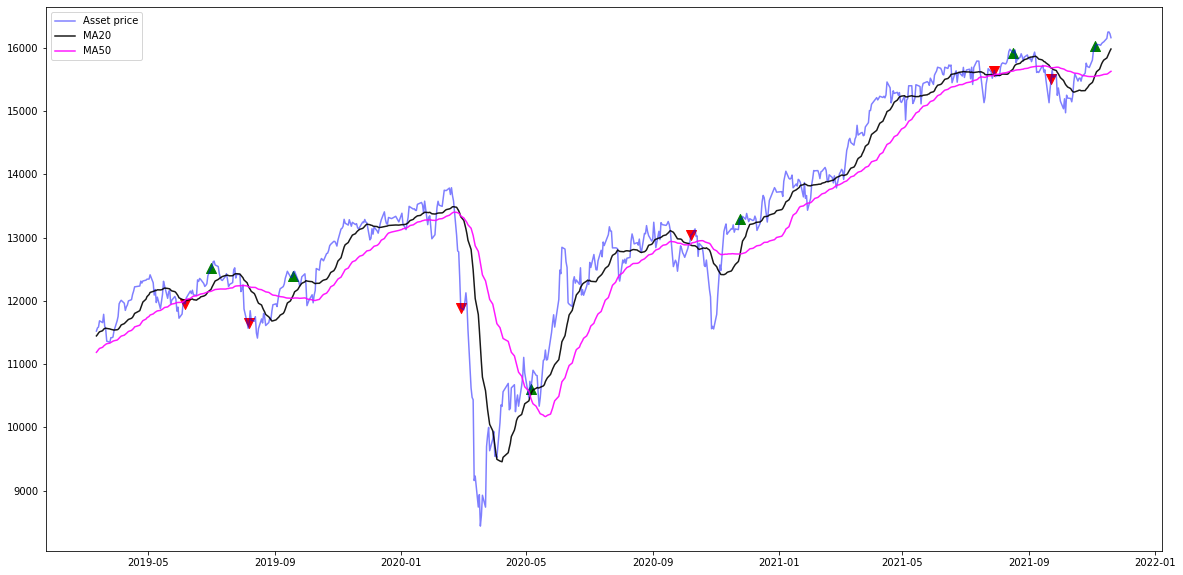

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df['Adj Close'], label= 'Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k', alpha =0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha =0.9)
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'],marker='^', color='green', s=100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'],marker='v', color='red', s=100)
plt.legend()
plt.show()
